In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import nltk 
nltk.download('punkt')
from collections import Counter
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string
from collections import OrderedDict

[nltk_data] Downloading package punkt to /Users/barry/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Load Data

In [2]:
technical_data = pd.read_csv('technical_job.csv')
technical_data.drop(columns=['Unnamed: 0','index'],inplace=True)

In [3]:
management_jobs = pd.read_csv('management_jobs.csv')
management_jobs.drop(columns=['Unnamed: 0','index'],inplace=True)

## Job Skills Visualizations

### Technical Jobs

Excluding the broad skills such as data science, it appears that the most demanded skills in technical jobs are machine learning, python, and presentation. Which is reasonable as python is one of the most adapted platform to perform machine learning on, and presentation is especially important when the results of machine learning is translated from a technical standpoint to business language for the company to decide on business operation issues.

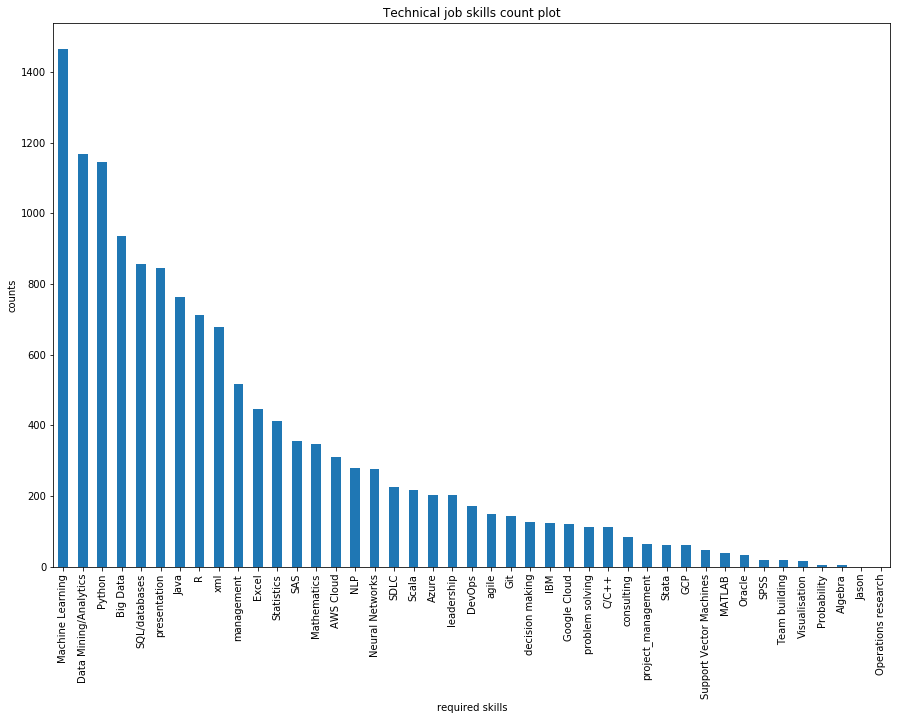

In [4]:
df_sum = technical_data.sum(numeric_only=True).sort_values(ascending=False)
plt.figure(figsize=(15,10))
df_sum.plot.bar()
plt.title('Technical job skills count plot')
plt.xlabel('required skills')
plt.ylabel('counts')
plt.show()

### Management Jobs

This graph illustrates the most demanding skills of management job posting dataset, it worth to mention that except some identical tehcnical skills, there are also some soft skills, such as: presentation, leadership, proble solving, consulting skills required in managegrial job.

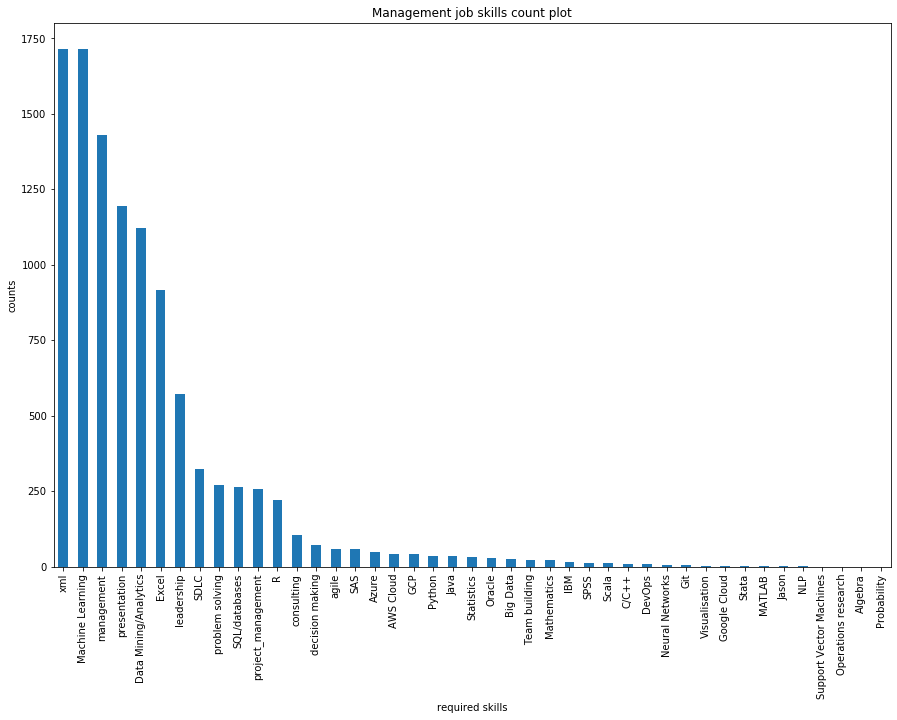

In [5]:
df_sum = management_jobs.sum(numeric_only=True).sort_values(ascending=False)
plt.figure(figsize=(15,10))
df_sum.plot.bar()
plt.title('Management job skills count plot')
plt.xlabel('required skills')
plt.ylabel('counts')
plt.show()

### Hierarchical clustering on Indeed and Linkedin Data

The code below will combine two datasets together, then plot a hierarchcal clustering plot to further develop each skills internal relationship.

In [6]:
df = pd.concat([technical_data, management_jobs], axis=0)
X = df.iloc[:, 2:].values

I manually divided the skills into two groups: soft skills and technical skills, I will perform Hierarchical clustering for them respectively, to find out what skills related to the other.

In [7]:
skill_soft = ['presentation', 'management','decision making', 'problem solving', 'Team building', 
              'problem solving', 'project_management', 'leadership', 'consulting']

skill_tech = ['Excel', 'Python', 'R', 'Java', 'Scala',
       'C/C++', 'MATLAB', 'SAS', 'SQL/databases', 'Oracle', 'SPSS', 'Stata',
       'Machine Learning', 'Data Mining/Analytics', 'NLP', 'Visualisation',
       'Big Data', 'AWS Cloud', 'Probability', 'Support Vector Machines',
       'Neural Networks', 'GCP', 'Jason', 'xml', 'Azure', 'Google Cloud',
       'Mathematics', 'IBM', 'Algebra', 'Statistics', 'Operations research',
       'DevOps', 'Git', 'agile', 'SDLC']

df_soft = df[skill_soft]
df_tech = df[skill_tech]

### Hieratchical Clustering on Technical Skills

This graph shows the technical skills hieratchical clustering result.

In [8]:
X_tech = df_tech.values

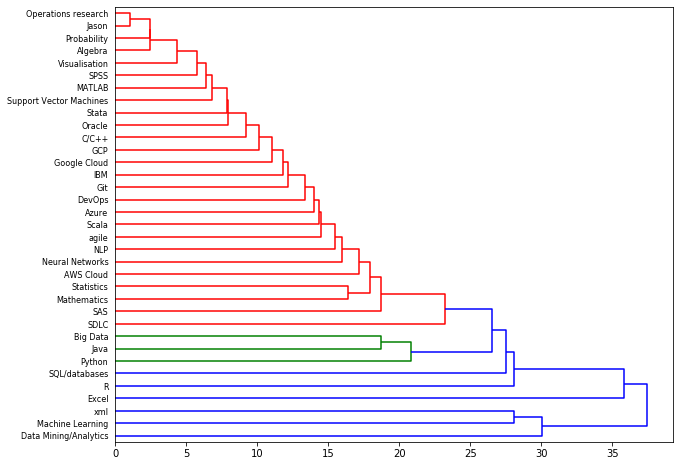

In [9]:
skill_tech = df_tech.columns.values
fig, ax = plt.subplots(1,1, figsize=(10, 8))
z = linkage(X_tech.T)
dn = dendrogram(z, orientation='right')
labels = skill_tech[dn['leaves']]
ax.set_yticklabels(labels)
plt.show()

The clustering results has grouped the topics in to three major categories. For group 1 (in red), skills such as neural net, NLP, and mathematics are very specific skillsets for artificial intelligence. Group 2 (in green), are the tools oftenly used to process and perform machine learning with, and group 3 (blue) are the skills that are used for querying and analysing results. Therefore, it is relatively safe to say that a person is very likely to get a technical job is he/she knows how to build or use AI, with a popular platform, and is able to analyze, or transporting them in or out of a database.

### Hieratchical Clustering on Management Skills 

This graph shows managerial skills hieratchical clustering result.

In [10]:
X_soft = df_soft.values

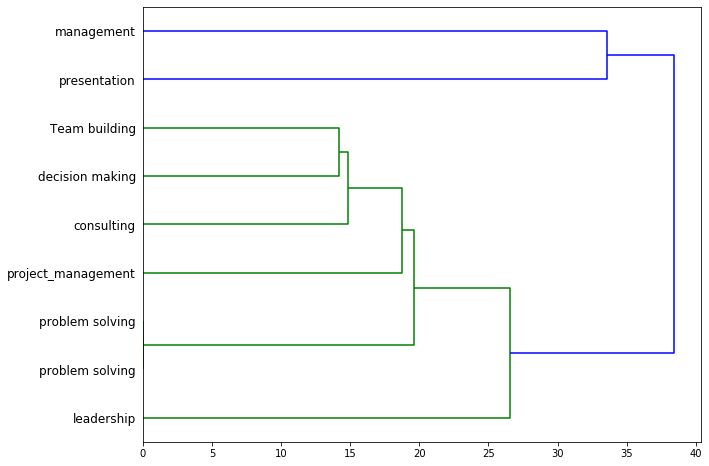

In [11]:
skill_manag= df_soft.columns.values
fig, ax = plt.subplots(1,1, figsize=(10, 8))
z = linkage(X_soft.T)
dn = dendrogram(z, orientation='right')
labels = skill_manag[dn['leaves']]
ax.set_yticklabels(labels)
plt.show()

The skills for management falls into 2 simple categories. The green clusters are generally skills that are needed within a group, while the blue clusters are skills that seems to output the results from the group work. 

## kaggle survey Data analysis

In order to finalize the course topic for MIE1624, we will also look at Kagge dataset as it engaged many surveyees who working in data related industry. The responses of them will provide us robust support.

In [12]:
kaggle = pd.read_csv('multipleChoiceResponses.csv')

/Users/barry/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Although the clustering results were able to show some level of pattern for the topics grouped together, they were not the grouping that was initially expected. Furthermore, it is rather difficult to have a clear distinction between a programming skill, a modeling skill, or a analysis skill with the current cluster result. Therefore, with the clustering result as a reference, we further categorised the results in to the following sections.

Programming Skills: Python and SQL are the most popular languages amongst all other language used for data science.

Machine Learning Skills: SKlearn provides a vast number of libraries and has made machine learning very easy to implement, while tensorflow is one of the most popular neural netword building tools used in industry and research.

Visualisaion Tools: Due to the popularity of Python, matplotlib and seaborn are two of the most popular tools used for result visualisation.

Types of Data: Numerical data is the most widely used data type as most of the data, regardless categorical or sequencial, falls in to this category as it is very simple to process and can be fitted into models directly.

Academic Achievement or Independent Project: It has shown that people widely believe that a independent project is more important than academic achievement. This may due to the fact that a project is more reflective on the person's overall ability to plan, to manage, and to carry out certain tasks in order to complete a certain goal.

### Skills

The function below will scan entire kaggle dataset to extract the surveyees' responses, who only engaged in data related jobs. 
A pre-selected job title:
  
    ['Data Scientist' , 'Data Analyst' , 'Business Analyst' , 'Data Engineer' ,'DBA/Database Engineer' , 'Marketing Analyst' , 'Data Journalist']

will be our filter to pick up surveyee who only work on data related jobs. This list comes from column 6(job title) in kaggle dataset.

The output of this function is a dictionary, keys are skills, values are count for each skill.

In [13]:
def skill_extraction(data_related_jobtitle, shape, filter1, dataset, start_col, end_col):

    i = 1
    skill_set = []
    while i < shape:
        scan_1 = dataset.iloc[i][filter1]
        scan_1 = str(scan_1)
        scan_1 = word_tokenize(scan_1.lower())#scan_1 return job title
        if scan_1 in data_related_jobtitle:# if one specific job title in job list, do following
            for column in dataset.columns[start_col:end_col]:
                scan_2 = dataset.iloc[i][column]
                scan_2 = str(scan_2)
                if scan_2 != 'nan':
                        skill_set.append(scan_2)
        i += 1
    return dict(Counter(skill_set))

#### programming skills

In kaggle dataset, column 65 to column 83 belongs to one question: which programming language you used at most at regular bases. By calling previuous skill_extraction function, we can extract all programming skills and counts of each skill.

In [14]:
data_job=[word_tokenize(x.lower()) for x in ['Data Scientist' , 'Data Analyst' , 'Business Analyst' , 'Data Engineer' ,'DBA/Database Engineer' , 'Marketing Analyst' , 'Data Journalist']]
programming_skills_data_job = skill_extraction(data_job, kaggle.shape[0], 'Q6' , kaggle, 65, 83)
programming_skills_data_job_sorted = OrderedDict(sorted(programming_skills_data_job.items(), key=lambda x: x[1]))
programming_skills_data_job_sorted

OrderedDict([('Julia', 73),
             ('Ruby', 77),
             ('None', 80),
             ('Go', 112),
             ('Other', 161),
             ('PHP', 240),
             ('C#/.NET', 380),
             ('Scala', 439),
             ('SAS/STATA', 517),
             ('Visual Basic/VBA', 553),
             ('MATLAB', 561),
             ('Javascript/Typescript', 773),
             ('C/C++', 799),
             ('Java', 889),
             ('Bash', 1067),
             ('R', 3061),
             ('SQL', 3885),
             ('Python', 5710)])

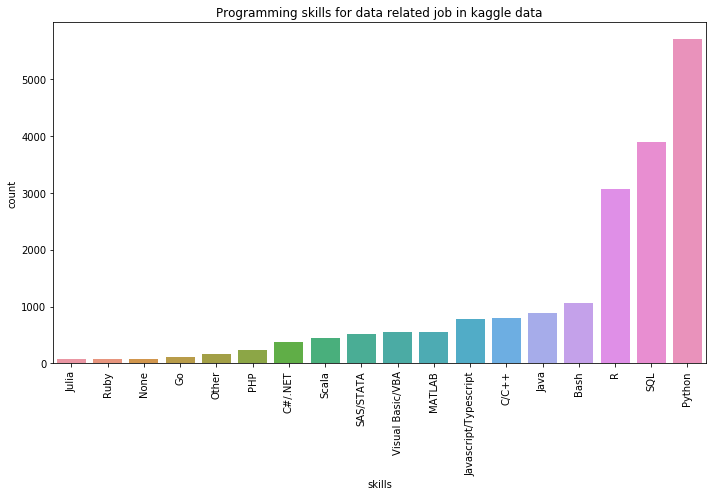

In [15]:
plt.figure(figsize=(10,7))
g = sns.barplot(x =list(programming_skills_data_job_sorted.keys()),y =list(programming_skills_data_job_sorted.values())).set(title = 'Programming skills for data related job in kaggle data',
                                                                                                         xlabel='skills',ylabel='count')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

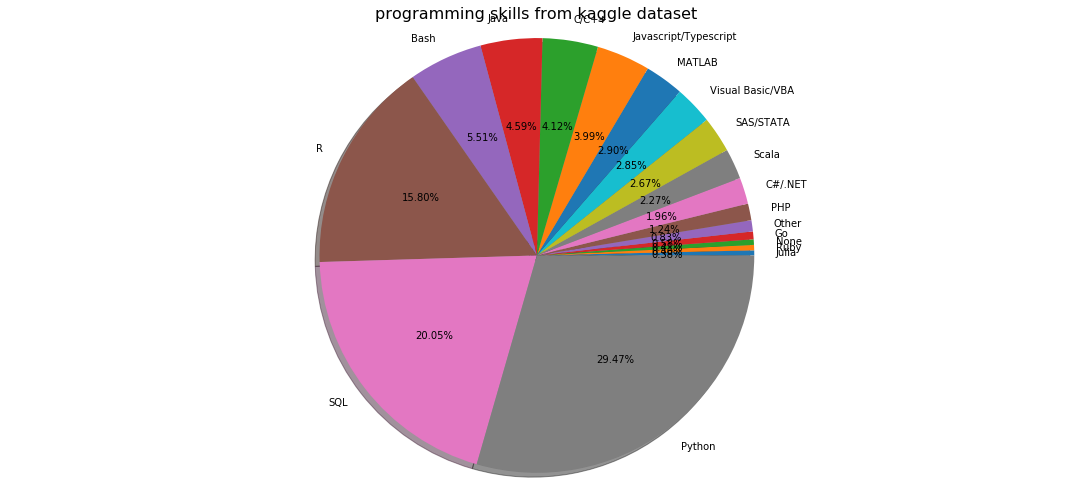

In [16]:
labels = list(programming_skills_data_job_sorted.keys())
sizes = list(programming_skills_data_job_sorted.values())
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True)
ax1.axis('equal') 
fig = plt.gcf()
plt.title('programming skills from kaggle dataset', fontsize=16)
plt.tight_layout()
plt.show()

The results shows that python and SQL are the top two most popular skills, both of them nearly take up 50%.

#### machine learning skills

Column 88 to column 107 asked surveyee which machine learning skill they use at most, similar process by calling skill_extraction function, we can get all machine learning related skills and counts of them.

In [17]:
data_job=[word_tokenize(x.lower()) for x in ['Data Scientist' , 'Data Analyst' , 'Business Analyst' , 'Data Engineer' ,'DBA/Database Engineer' , 'Marketing Analyst' , 'Data Journalist']]
ml_skills = skill_extraction(data_job, kaggle.shape[0], 'Q6', kaggle, 88, 107)
ml_skills_sorted = OrderedDict(sorted(ml_skills.items(), key=lambda x: x[1]))

ml_skills_sorted

OrderedDict([('Other', 170),
             ('Mxnet', 275),
             ('mlr', 312),
             ('CNTK', 334),
             ('Caffe', 351),
             ('Fastai', 469),
             ('Prophet', 486),
             ('catboost', 588),
             ('None', 775),
             ('H20', 805),
             ('lightgbm', 1123),
             ('Spark MLlib', 1156),
             ('Caret', 1312),
             ('PyTorch', 1350),
             ('Xgboost', 2886),
             ('randomForest', 2953),
             ('Keras', 3086),
             ('TensorFlow', 3518),
             ('Scikit-Learn', 4830)])

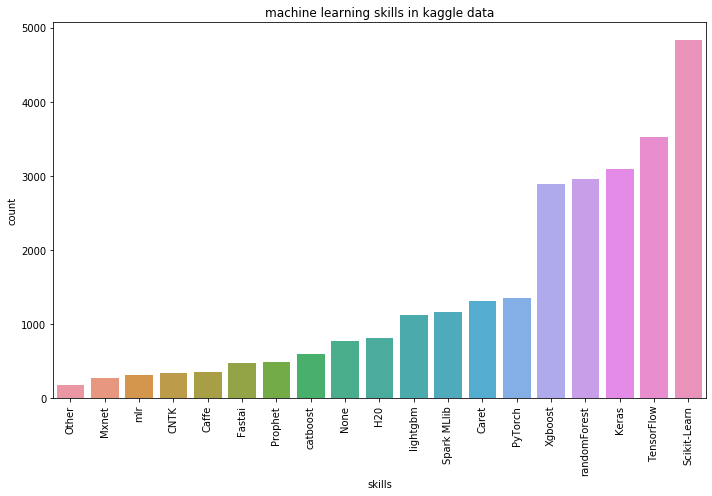

In [18]:
plt.figure(figsize=(10,7))
g = sns.barplot(x =list(ml_skills_sorted.keys()),y =list(ml_skills_sorted.values())).set(title = 'machine learning skills in kaggle data',
                                                                                                         xlabel='skills',ylabel='count')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

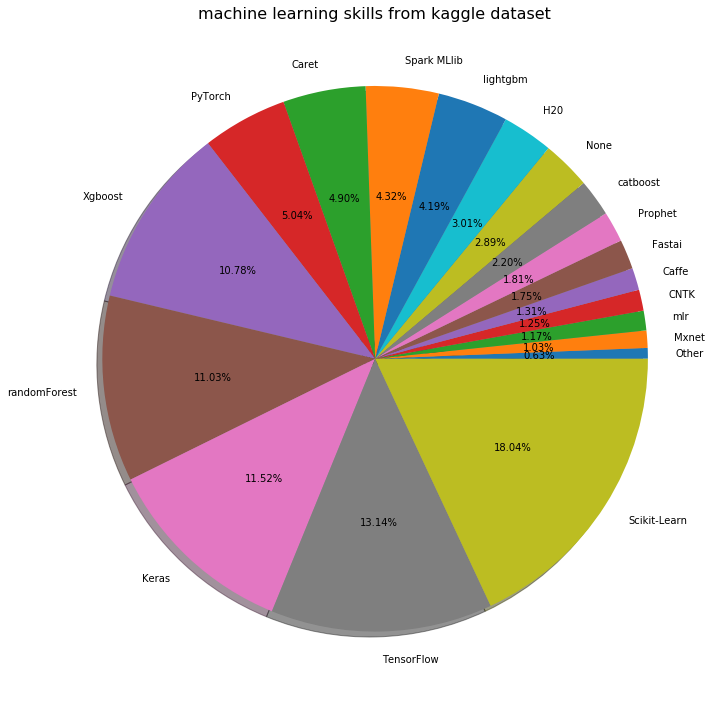

In [19]:
labels = list(ml_skills_sorted.keys())
sizes = list(ml_skills_sorted.values())
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True)
ax1.axis('equal') 
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('machine learning skills from kaggle dataset', fontsize=16)
plt.tight_layout()
plt.show()

It shows that Scikit-Learn was the most popular skills, followed by tensorflow, keras.

#### Visualisation tools

Column 110 to column 123 in kaggle dataset asked surveyee which visualisation tool they used at most.

In [20]:
data_job=[word_tokenize(x.lower()) for x in ['Data Scientist' , 'Data Analyst' , 'Business Analyst' , 'Data Engineer' ,'DBA/Database Engineer' , 'Marketing Analyst' , 'Data Journalist']]
data_visual_skills = skill_extraction(data_job, kaggle.shape[0], 'Q6', kaggle, 110, 123)
data_visual_skills_sorted = OrderedDict(sorted(data_visual_skills.items(), key=lambda x: x[1]))
data_visual_skills_sorted

OrderedDict([('Altair', 108),
             ('Other', 194),
             ('Geoplotlib', 332),
             ('None', 423),
             ('Lattice', 431),
             ('Leaflet', 533),
             ('D3', 986),
             ('Bokeh', 992),
             ('Shiny', 1515),
             ('Plotly', 2698),
             ('Seaborn', 3461),
             ('ggplot2', 3618),
             ('Matplotlib', 4903)])

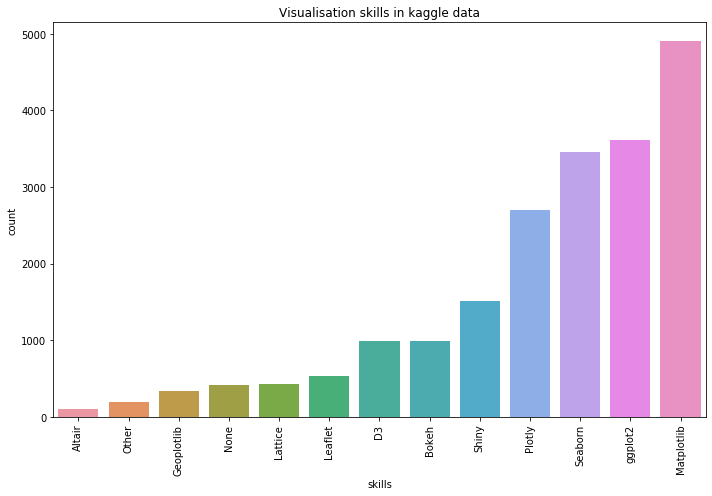

In [21]:
plt.figure(figsize=(10,7))
g = sns.barplot(x =list(data_visual_skills_sorted.keys()),y =list(data_visual_skills_sorted.values())).set(title = 'Visualisation skills in kaggle data',
                                                                                                         xlabel='skills',ylabel='count')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

It not surperise that top 1 is Matplotlib, ggplot2, seaborn, they are all based on the most popular programming skill(python).

#### Big Data skill

Column 224 to column 247 in kagge dataset asked surveyees what big data skill they encountered most at their daily job.

In [22]:
data_job=[word_tokenize(x.lower()) for x in ['Data Scientist' , 'Data Analyst' , 'Business Analyst' , 'Data Engineer' ,'DBA/Database Engineer' , 'Marketing Analyst' , 'Data Journalist']]
bigdata_skills = skill_extraction(data_job, kaggle.shape[0], 'Q6', kaggle, 224, 247)
bigdata_skills_sorted = OrderedDict(sorted(bigdata_skills.items(), key=lambda x: x[1]))
bigdata_skills_sorted

OrderedDict([('SAP IQ', 24),
             ('IBM Cloud Streaming Analytics', 28),
             ('IBM InfoSphere DataStorage', 28),
             ('IBM Cloud Analytics Engine', 58),
             ('Oracle Warehouse Builder', 69),
             ('Azure Stream Analytics', 94),
             ('AWS Batch', 102),
             ('Google Cloud Dataprep', 103),
             ('Google Cloud Dataproc', 118),
             ('Oracle Exadata', 118),
             ('Google Cloud Pub/Sub', 128),
             ('Snowflake', 149),
             ('Azure HDInsight', 152),
             ('AWS Kinesis', 157),
             ('Azure SQL Data Warehouse', 164),
             ('Google Cloud Dataflow', 187),
             ('AWS Athena', 218),
             ('Microsoft Analysis Services', 225),
             ('AWS Elastic MapReduce', 331),
             ('Teradata', 382),
             ('Databricks', 522),
             ('AWS Redshift', 612),
             ('Google BigQuery', 653)])

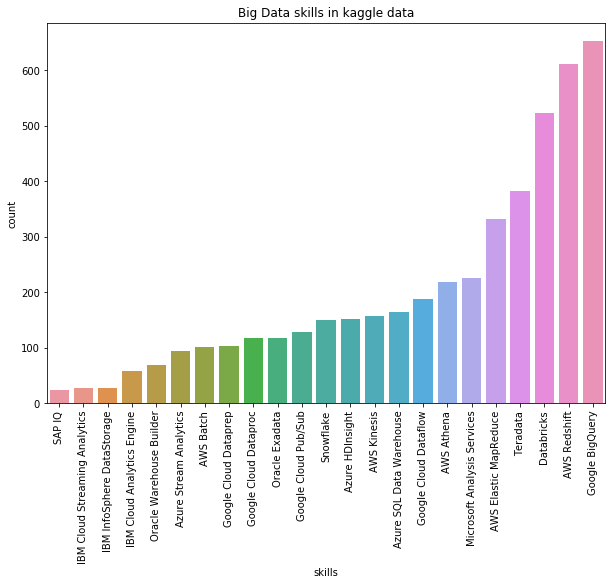

In [23]:
plt.figure(figsize=(10,7))
g = sns.barplot(x =list(bigdata_skills_sorted.keys()),y =list(bigdata_skills_sorted.values())).set(title = 'Big Data skills in kaggle data',
                                                                                                         xlabel='skills',ylabel='count')
plt.xticks(rotation = 90)
plt.show()

The bar chart above shows that each big data skill count plot, Google BigQuery is the most popular big data skill.

####  Types of data

Column 250 to column 260 in kaggle dataset asked surveyees which types of data they are working on mostly in their job.

In [24]:
data_job=[word_tokenize(x.lower()) for x in ['Data Scientist' , 'Data Analyst' , 'Business Analyst' , 'Data Engineer' ,'DBA/Database Engineer' , 'Marketing Analyst' , 'Data Journalist']]
typedata_skills = skill_extraction(data_job, kaggle.shape[0], 'Q6', kaggle, 250, 260)
typedata_skills_sorted = OrderedDict(sorted(typedata_skills.items(), key=lambda x: x[1]))
typedata_skills_sorted

OrderedDict([('Audio Data', 270),
             ('Genetic Data', 342),
             ('Sensor Data', 879),
             ('Geospatial Data', 1058),
             ('Image Data', 1464),
             ('Tabular Data', 3373),
             ('Text Data', 3487),
             ('Time Series Data', 3525),
             ('Categorical Data', 3742),
             ('Numerical Data', 4568)])

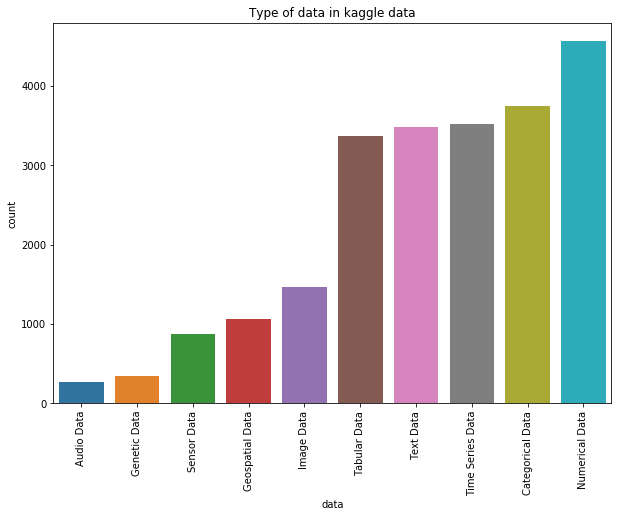

In [25]:
plt.figure(figsize=(10,7))
g = sns.barplot(x =list(typedata_skills_sorted.keys()),y =list(typedata_skills_sorted.values())).set(title = 'Type of data in kaggle data',
                                                                                                         xlabel='data',ylabel='count')
plt.xticks(rotation = 90)
plt.show()

The bar chart shows that, numerical data is the most frequently data type in data science job, the next four data types (Categorical, Time series, Text data, Tabular data) are nearly equal.

#### Academic achievements or independent projects

Column 40 asked people what their opinion about independent project compare to academic achievements.

In [26]:
kaggle.Q40.value_counts()

Independent projects are much more important than academic achievements                                              4990
Independent projects are slightly more important than academic achievements                                          4473
Independent projects are equally important as academic achievements                                                  4343
No opinion; I do not know                                                                                             936
Independent projects are slightly less important than academic achievements                                           831
Independent projects are much less important than academic achievements                                               306
Which better demonstrates expertise in data science: academic achievements or independent projects? - Your views:       1
Name: Q40, dtype: int64

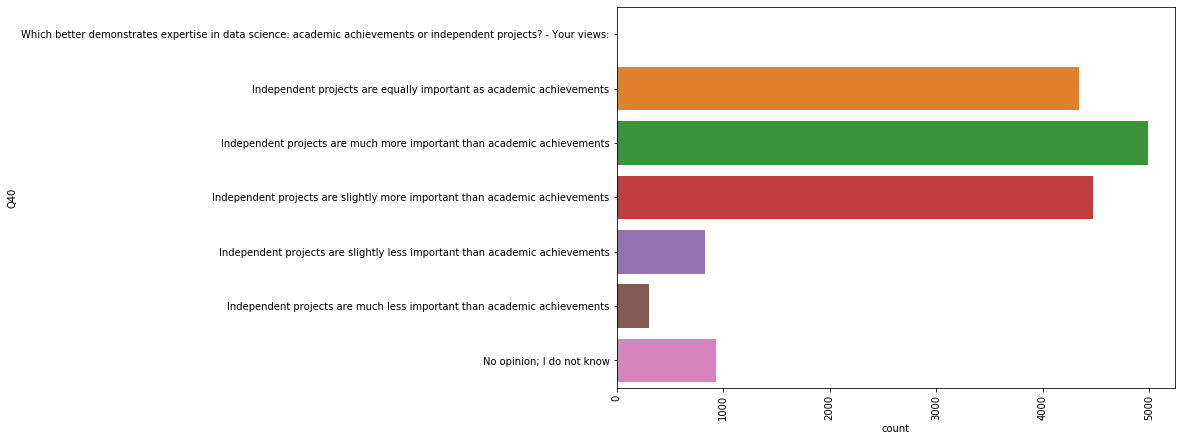

In [27]:
plt.figure(figsize=(10,7))
sns.countplot(y='Q40',data=kaggle)
plt.xticks(rotation = 90)
plt.show()

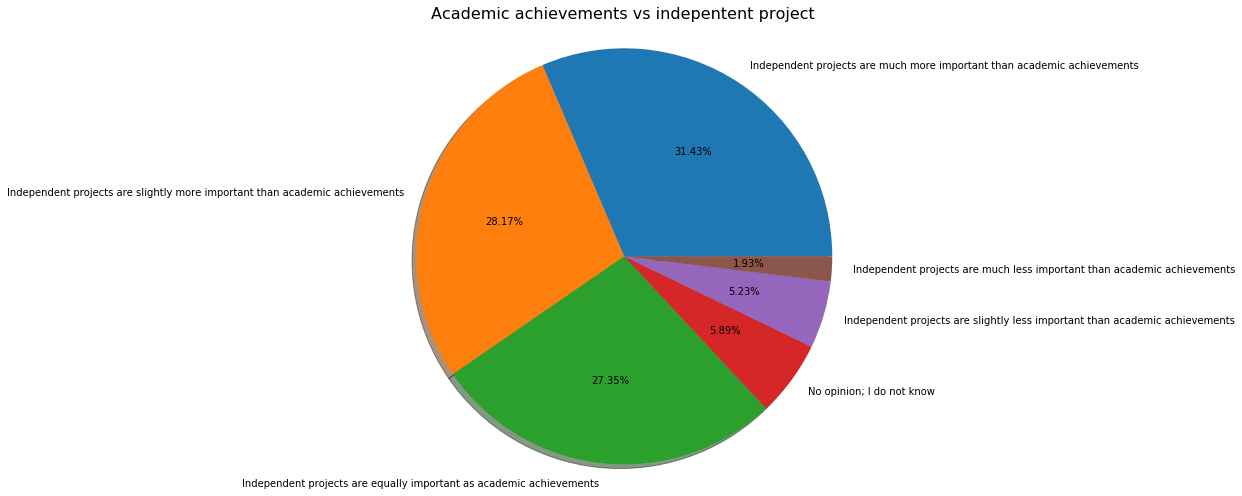

In [28]:
labels = list(kaggle.Q40.value_counts().keys()[0:6])
sizes = list(kaggle.Q40.value_counts()[0:6])
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True)
#ax1.pie(sizes, autopct='%1.2f%%', shadow=True)
ax1.axis('equal') 
fig = plt.gcf()
plt.title('Academic achievements vs indepentent project', fontsize=16)
plt.tight_layout()
plt.show()

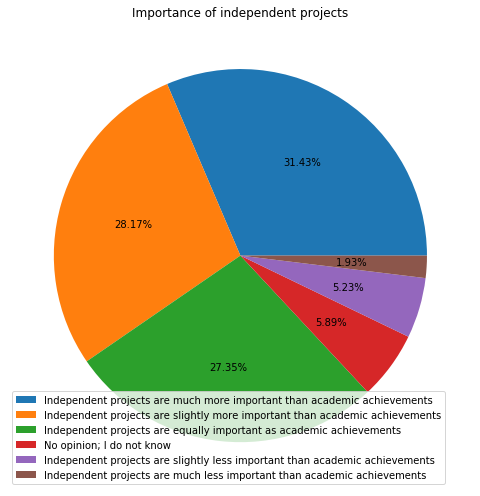

In [29]:
labels = list(kaggle.Q40.value_counts().keys()[0:6])
sizes = list(kaggle.Q40.value_counts()[0:6])
fig1, ax1 = plt.subplots(figsize=(10,7))
ax1.pie(sizes, autopct='%1.2f%%')
plt.title('Importance of independent projects')
plt.legend(labels,loc=3)
plt.tight_layout()
plt.show()

Around 31% people think independent projects are much more important than academic achievement.

### Hierarchical clustering on Skills from Kaggle Survey

The function below will scan column ['Q11', 'Q14', 'Q15', 'Q16', 'Q19', 'Q21', 'Q31', 'Q47'], these questions were assumed to be the most relevant to the desing of course curriculum. 

The output of this cell will be a data frame, each column is a skill filled by etheir 0  or 1, further we will use this dataframe to perform clustering analysis, its rows representing the survey respondents.

In [32]:
min_records = kaggle.shape[0]
responses = kaggle.drop(0)
iteration = 0
for question in ['Q11', 'Q14', 'Q15', 'Q16', 'Q19', 'Q21', 'Q31', 'Q47']:
    # get a list of columns that contain this question
    question_cols = [col for col in responses.columns if question in col]
    # drop the last three elements from the list (free text, None, Other answer options)
    question_cols.pop()
    question_cols.pop()
    question_cols.pop()
    question_subset = responses[question_cols].copy()
    answer_categories = []
    for column in question_subset.columns:
        answer_categories.append(kaggle.iloc[0].loc[column].split(' - ')[-1])
        question_subset[column] = question_subset[column].str.replace(re.escape(answer_categories[-1]), '1')
        question_subset[column] = question_subset[column].fillna(0)
        if question_subset[column].value_counts().loc[0] > min_records:
            question_subset = question_subset.drop(column, axis=1)
            answer_categories.pop()
        else:
            question_subset[column] = question_subset[column].astype('int')
    question_subset.columns = answer_categories
    iteration += 1
    if iteration ==1:
        questions_df = question_subset
    else:
        questions_df = pd.concat([questions_df, question_subset], axis=1)

A dataframe that contains all skill extracted, filled in ehtheir 0 or 1 represent the skills for each respondents, it is used to obtain an Hierarchical Clustering dendrogram that visualizes how each of the skills relate to one another. This is used to assist us in combining the skills in the same, or close, clusters together to inform decision about designing our curriculum.

From the original 396 columns in Kaggle survey, the final list of features includes 52 skills.

In [33]:
print("found required skills as follow: \n\n",questions_df.columns)

found required skills as follow: 

 Index(['Analyze and understand data to influence product or business decisions',
       'Build and/or run a machine learning service that operationally improves my product or workflows',
       'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data',
       'Build prototypes to explore applying machine learning to new areas',
       'Do research that advances the state of the art of machine learning',
       'Kaggle Kernels', 'Google Colab', 'Azure Notebook', 'Domino Datalab',
       'Google Cloud Datalab', 'Paperspace', 'Floydhub', 'Crestle',
       'JupyterHub/Binder', 'Google Cloud Platform (GCP)',
       'Amazon Web Services (AWS)', 'Microsoft Azure', 'IBM Cloud',
       'Alibaba Cloud', 'Python', 'R', 'SQL', 'Bash', 'Java',
       'Javascript/Typescript', 'Visual Basic/VBA', 'C/C++', 'MATLAB', 'Scala',
       'Julia', 'Go', 'C#/.NET', 'PHP', 'Ruby', 'SAS/STATA', 'Scikit-Learn',
       'T

I manually divided the 52 skills into two groups: skill platform which contains all coding and working platforms, and skill_tech_minority, which contains some advanced skills or minority skills that we dont often used in data science job.

These two group will further grouped into two skills, various_platforms and minority skills, by doing this, we can reduce unnecessary and huge outputs of hierarchical clustering.

In [34]:
skill_platform = ['Google Colab', 'Azure Notebook', 'Domino Datalab',
                  'Google Cloud Datalab', 'Paperspace', 'Floydhub', 'Crestle',
                  'JupyterHub/Binder', 'Google Cloud Platform (GCP)',
                  'Amazon Web Services (AWS)', 'Microsoft Azure', 'IBM Cloud',
                  'Alibaba Cloud']


skill_tech_minority = ['LIME functions','ELI5 functions', 'SHAP functions','H20', 'Fastai',
                  'Mxnet', 'Caret','mlr', 'Prophet','lightgbm','Leaflet', 'Lattice', 'Julia', 
                  'Go', 'C#/.NET', 'PHP', 'Ruby', 'SAS/STATA','Altair', 'Shiny', 'D3', 'Plotly',
                   'Bokeh','catboost', 'CNTK', 'Caffe', 'ggplot2']


df_regular = questions_df



df_minority = questions_df[skill_tech_minority]
df_platform = questions_df[skill_platform]



df_regular['various_platforms'] = (df_platform.sum(axis=1)>0)*1
df_regular['minority_skill'] = (df_minority.sum(axis=1)>0)*1


df_regular.drop(skill_platform,axis=1,inplace = True)
df_regular.drop(skill_tech_minority,axis=1,inplace=True)
X_tech = df_regular.values

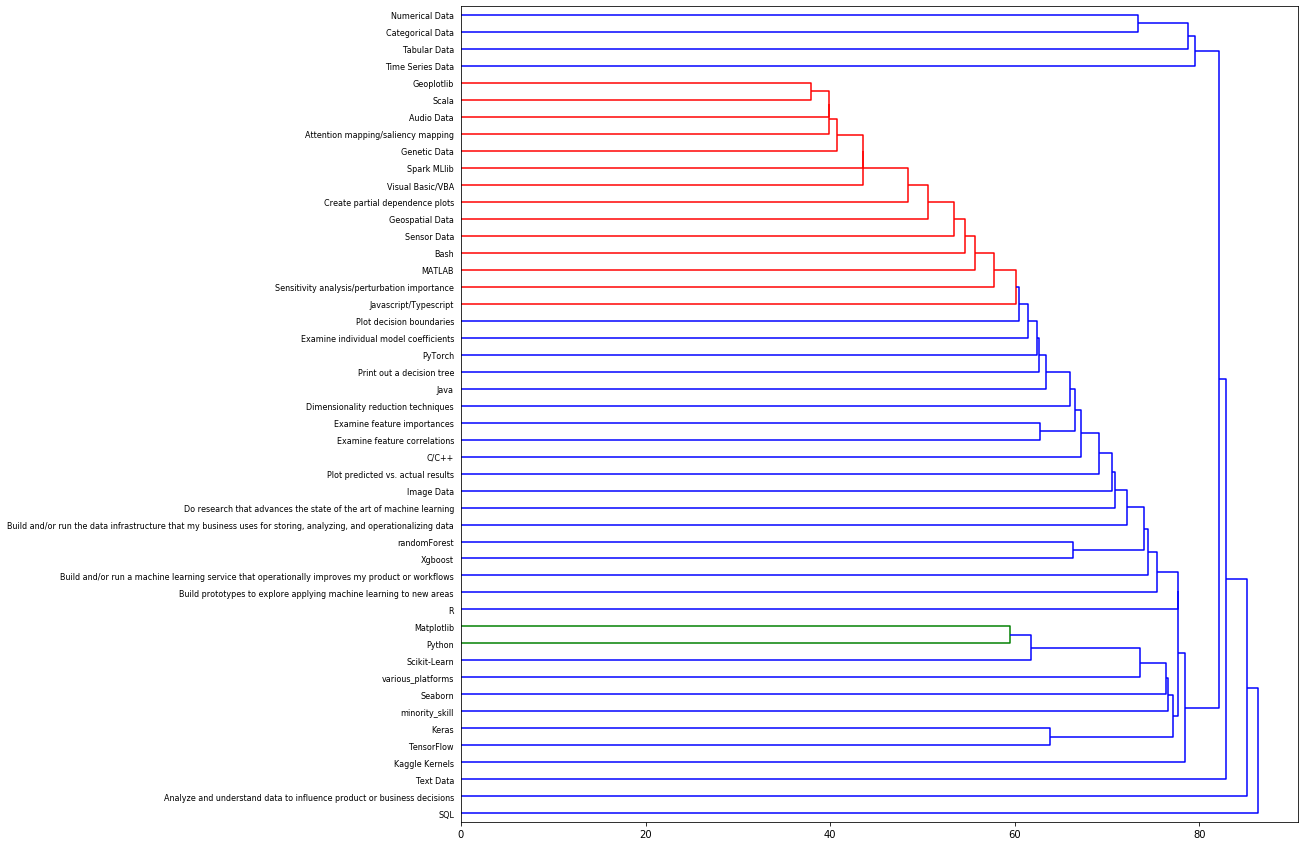

In [35]:
skill_tech = df_regular.columns.values
fig, ax = plt.subplots(1,1, figsize=(15, 15))
z = linkage(X_tech.T)
dn = dendrogram(z, orientation='right')
labels = skill_tech[dn['leaves']]
ax.set_yticklabels(labels)
plt.show()